In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

math = pd.read_csv('stud_math.csv')
math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 


Описание датасета

Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике


Рекомендации по выполнению проекта

Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
Посмотрите на распределение признака для числовых переменных, устраните выбросы.
Оцените количество уникальных значений для номинативных переменных.
По необходимости преобразуйте данные
Проведите корреляционный анализ количественных переменных
Отберите не коррелирующие переменные.
Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.


In [3]:
math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [4]:
# определяем количество пустых значений по столбцам
# пустые значения присутствуют во всех столбцах, кроме school, sex, age.
# требуется поработать над пропусками и выбросами (далее проверим, есть ли они)

math.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [5]:
# Первичный анализ данных по столбцам
# Столбец school, без пустых значений и выбросов

pd.DataFrame(math.school.value_counts())

,school
GP,349
MS,46


count     395
unique      2
top        GP
freq      349
Name: school, dtype: object

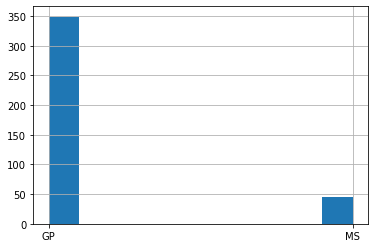

In [6]:
math.school.hist()
math.school.describe()

In [7]:
# превалирующее число учеников из школы GP

In [8]:
# Первичный анализ данных по столбцам
# Столбец sex, столбец без пустых значений
pd.DataFrame(math.sex.value_counts())

,sex
F,208
M,187


count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

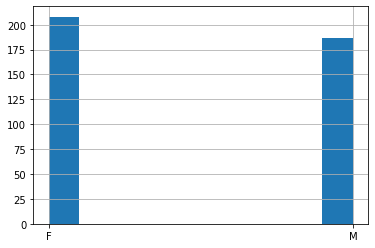

In [9]:
math.sex.hist()
math.sex.describe()

In [10]:
# девочек больше, чем мальчиков, но не на много

In [11]:
# Первичный анализ данных по столбцам
# Столбец age, выше определили, что столбец без пустых значений
pd.DataFrame(math.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

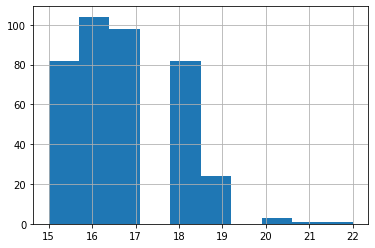

In [12]:
math.age.hist()
math.age.describe()

In [13]:
# столбец с возрастом не имеет пустых значений, неравномерное распределение: больше всего учеников возраста 15-17 лет,
# наименьшее количество учеников имеют возраст 20-22 года

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


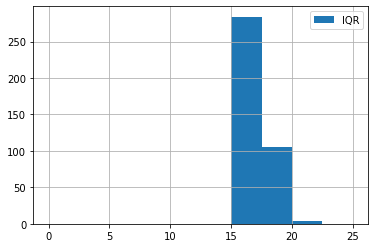

In [14]:
median_age = math.age.median()
IQR_age = math.age.quantile(0.75) - math.age.quantile(0.25)
perc25_age = math.age.quantile(0.25)
perc75_age = math.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25_age), '75-й перцентиль: {},'.format(perc75_age), "IQR: {}, ".format(IQR_age),
      "Границы выбросов: [{f}, {l}].".format(f=perc25_age - 1.5*IQR_age, l=perc75_age + 1.5*IQR_age))
math.age.loc[math.age.between(perc25_age - 1.5*IQR_age, perc75_age + 1.5*IQR_age)].hist(bins=10, range=(0, 25),
                                                                                        label='IQR')
plt.legend()

In [15]:
# Первичный анализ данных по столбцам
# Столбец address, есть пустые значения
math.address = math.address.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(math.address.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (math.address.value_counts() > 10).sum())
print("Уникальных значений:", math.address.nunique())
math.loc[:, ['address']].info()

# в датасете больше всего учеников живут в городе

,address
U,295
R,83
nan,17


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [16]:
# заменим пустые значения на наиболее часто встречающиеся - ученик живет в черте города
math.address = math.address.astype(str).apply(
    lambda x: 'U' if x.strip() == 'nan' else x)
math.address.value_counts()

U    312
R     83
Name: address, dtype: int64

In [17]:
# Первичный анализ данных по столбцам
# Столбец famsize
math.famsize = math.famsize.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(math.famsize.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (math.famsize.value_counts() > 10).sum())
print("Уникальных значений:", math.famsize.nunique())
math.loc[:, ['famsize']].info()

,famsize
GT3,261
LE3,107
nan,27


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [18]:
# заменим пустые значения, 27 шт, на наиболее часто встречающиеся - размер семьи больше 3 чел
math.famsize = math.famsize.astype(str).apply(
    lambda x: 'GT3' if x.strip() == 'nan' else x)
math.famsize.value_counts()

GT3    288
LE3    107
Name: famsize, dtype: int64

In [19]:
# Первичный анализ данных по столбцам
# Столбец Pstatus
pd.DataFrame(math.Pstatus.value_counts())
math.Pstatus = math.Pstatus.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(math.Pstatus.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (math.Pstatus.value_counts() > 10).sum())
print("Уникальных значений:", math.Pstatus.nunique())
math.loc[:, ['Pstatus']].info()

,Pstatus
T,314
nan,45
A,36


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [20]:
# заменим пустые значения,45 шт, на наиболее часто встречающиеся - родители живут вместе
math.Pstatus = math.Pstatus.astype(str).apply(
    lambda x: 'T' if x.strip() == 'nan' else x)
math.Pstatus.value_counts()

T    359
A     36
Name: Pstatus, dtype: int64

In [21]:
# Первичный анализ данных по столбцам
# Столбец Medu
pd.DataFrame(math.Medu.value_counts())
math.Medu = math.Medu.apply(lambda x: None if x == '' else x)
display(pd.DataFrame(math.Medu.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (math.Medu.value_counts() > 10).sum())
print("Уникальных значений:", math.Medu.nunique())
math.loc[:, ['Medu']].info()

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [22]:
# Первичный анализ данных по столбцам
# Столбец Fedu
pd.DataFrame(math.Fedu.value_counts())
math.Fedu = math.Fedu.apply(lambda x: None if x == '' else x)
display(pd.DataFrame(math.Fedu.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (math.Fedu.value_counts() > 10).sum())
print("Уникальных значений:", math.Fedu.nunique())
math.loc[:, ['Fedu']].info()

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [76]:

# заменим nan на значение 0 - образования нет
math.Fedu = math.Fedu.astype(str).apply(
    lambda x: '0.0' if x.strip() == 'nan' else x)
math.Fedu.value_counts()

2.0    107
3.0     96
4.0     88
1.0     78
0.0     26
Name: Fedu, dtype: int64

In [ ]:
# в столбце есть выбросы - одно значение - 40 - не в пределах наших допустимых значений
# заменим выброс на наиболее частое значение
math.Fedu = math.Fedu.astype(str).apply(
    lambda x: '2.0' if x.strip() == '40.0' else x)
math.Fedu.value_counts()

In [24]:
# Первичный анализ данных по столбцам
# Столбец Mjob

pd.DataFrame(math.Mjob.value_counts())
math.Mjob = math.Mjob.apply(lambda x: None if x == '' else x)
display(pd.DataFrame(math.Mjob.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (math.Mjob.value_counts() > 10).sum())
print("Уникальных значений:", math.Mjob.nunique())
math.loc[:, ['Mjob']].info()

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [25]:
# заменим пустые значения, 19 шт, на наиболее часто встречающиеся - работа матери - "другое"
math.Mjob = math.Mjob.apply(lambda y: 'other' if y == 'nan' else y)
math.Mjob.value_counts()

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

In [26]:
# Первичный анализ данных по столбцам
# Столбец Fjob
pd.DataFrame(math.Fjob.value_counts())
math.Fjob = math.Fjob.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(math.Fjob.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (math.Fjob.value_counts() > 10).sum())
print("Уникальных значений:", math.Fjob.nunique())
math.loc[:, ['Fjob']].info()

,Fjob
other,197
services,102
nan,36
teacher,29
at_home,16
health,15


Значений, встретившихся в столбце более 10 раз: 6
Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [27]:
# заменим пустые значения, 36 шт,  на наиболее часто встречающиеся - работа отца - "другое"
math.Fjob = math.Fjob.apply(lambda y: 'other' if y.strip() == 'nan' else y)
math.Fjob.value_counts()

other       233
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [28]:
# Первичный анализ данных по столбцам
# Столбец guardian
pd.DataFrame(math.guardian.value_counts())
math.guardian = math.guardian.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(math.guardian.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (math.guardian.value_counts() > 10).sum())
print("Уникальных значений:", math.guardian.nunique())
math.loc[:, ['guardian']].info()

,guardian
mother,250
father,86
nan,31
other,28


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [29]:
# заменим пустые значения на наиболее часто встречающиеся - опекун-мать
math.guardian = math.guardian.apply(
    lambda y: 'mother' if y.strip() == 'nan' else y)
math.guardian.value_counts()

mother    281
father     86
other      28
Name: guardian, dtype: int64

In [30]:
# Первичный анализ данных по столбцам
# Столбец traveltime
pd.DataFrame(math.traveltime.value_counts())
math.traveltime = math.traveltime.apply(lambda x: None if x == '' else x)
display(pd.DataFrame(math.traveltime.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (math.traveltime.value_counts() > 10).sum())
print("Уникальных значений:", math.traveltime.nunique())
math.loc[:, ['traveltime']].info()

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [31]:
math.traveltime.median()

1.0

In [32]:
# заменим пустые значения и на наиболее часто встречающиеся - время в пути до школы менее 15 мин
math.traveltime = math.traveltime.apply(lambda y: '1.0' if y == 'nan' else y)
math.traveltime.value_counts()

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

In [33]:
# Первичный анализ данных по столбцам
# Столбец studytime
pd.DataFrame(math.studytime.value_counts())
math.studytime = math.studytime.apply(lambda x: None if x == '' else x)
display(pd.DataFrame(math.studytime.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (math.studytime.value_counts() > 10).sum())
print("Уникальных значений:", math.studytime.nunique())
math.loc[:, ['studytime']].info()

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [34]:
math.studytime.median()

2.0

In [35]:
# заменим пустые значения на медианное значение - время на учёбу помимо школы в неделю 2-5 часов
math.studytime = math.studytime.apply(lambda y: '2.0' if y == 'nan' else y)
math.studytime.value_counts()

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

In [36]:
# Первичный анализ данных по столбцам
# Столбец failures
pd.DataFrame(math.failures.value_counts())
math.failures = math.failures.apply(lambda x: None if x == '' else x)
display(pd.DataFrame(math.failures.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (math.failures.value_counts() > 10).sum())
print("Уникальных значений:", math.failures.nunique())
math.loc[:, ['failures']].info()

,failures
0.0,293
1.0,49
2.0,16
3.0,15


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [37]:
math.failures.median()

0.0

In [38]:
# заменим пустые значения на медианное значение количество внеучебных неудач равное 0
math.failures = math.failures.apply(lambda y: '0.0' if y == 'nan' else y)
math.failures.value_counts()

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

In [39]:
# Первичный анализ данных по столбцам
# Столбец schoolsup
pd.DataFrame(math.schoolsup.value_counts())
math.schoolsup = math.schoolsup.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(math.schoolsup.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (math.schoolsup.value_counts() > 10).sum())
print("Уникальных значений:", math.schoolsup.nunique())
math.loc[:, ['schoolsup']].info()

,schoolsup
no,335
yes,51
nan,9


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [40]:
# заменим пустые значения на медианное значение - дополнительная образовательная поддержка - НЕТ
math.schoolsup = math.schoolsup.astype(str).apply(
    lambda y: 'no' if y.strip() == 'nan' else y)
math.schoolsup.value_counts()

no     344
yes     51
Name: schoolsup, dtype: int64

In [41]:
# Первичный анализ данных по столбцам
# Столбец famsup
pd.DataFrame(math.famsup.value_counts())
math.famsup = math.famsup.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(math.famsup.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (math.famsup.value_counts() > 10).sum())
print("Уникальных значений:", math.famsup.nunique())
math.loc[:, ['famsup']].info()

,famsup
yes,219
no,137
nan,39


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [42]:
# заменим пустые значения на медианное значение - семейная образовательная поддержка yes
math.famsup = math.famsup.astype(str).apply(
    lambda y: 'yes' if y.strip() == 'nan' else y)
math.famsup.value_counts()

yes    258
no     137
Name: famsup, dtype: int64

In [43]:
# Первичный анализ данных по столбцам
# Столбец paid
pd.DataFrame(math.paid.value_counts())
math.paid = math.paid.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(math.paid.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (math.paid.value_counts() > 10).sum())
print("Уникальных значений:", math.paid.nunique())
math.loc[:, ['paid']].info()

,paid
no,200
yes,155
nan,40


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [44]:
# заменим пустые значения на медианное значение - дополнительные платные занятия по математике yes
math.paid = math.paid.astype(str).apply(
    lambda y: 'yes' if y.strip() == 'nan' else y)
math.paid.value_counts()

no     200
yes    195
Name: paid, dtype: int64

In [45]:
# Первичный анализ данных по столбцам
# Столбец activities
pd.DataFrame(math.activities.value_counts())
math.activities = math.activities.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(math.activities.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (math.activities.value_counts() > 10).sum())
print("Уникальных значений:", math.activities.nunique())
math.loc[:, ['activities']].info()

,activities
yes,195
no,186
nan,14


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [46]:
# заменим пустые значения на медианное значение-  дополнительные внеучебные занятия yes
math.activities = math.activities.astype(str).apply(
    lambda y: 'yes' if y.strip() == 'nan' else y)
math.activities.value_counts()

yes    209
no     186
Name: activities, dtype: int64

In [47]:
# Первичный анализ данных по столбцам
# Столбец nursery
pd.DataFrame(math.nursery.value_counts())
math.nursery = math.nursery.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(math.nursery.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (math.nursery.value_counts() > 10).sum())
print("Уникальных значений:", math.nursery.nunique())
math.loc[:, ['nursery']].info()

,nursery
yes,300
no,79
nan,16


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [48]:
# заменим пустые значения на медианное значение - посещал детский сад yes
math.nursery = math.nursery.astype(str).apply(
    lambda y: 'yes' if y.strip() == 'nan' else y)
math.nursery.value_counts()

yes    316
no      79
Name: nursery, dtype: int64

In [49]:
# Первичный анализ данных по столбцам
# Столбец studytime, granular
pd.DataFrame(math['studytime, granular'].value_counts())
math['studytime, granular'] = math['studytime, granular'].apply(
    lambda x: None if x == '' else x)
display(pd.DataFrame(math['studytime, granular'].value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (math['studytime, granular'].value_counts() > 10).sum())
print("Уникальных значений:", math['studytime, granular'].nunique())
math.loc[:, ['studytime, granular']].info()

,"studytime, granular"
-6.0,194
-3.0,103
-9.0,64
-12.0,27


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studytime, granular  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [50]:
# Первичный анализ данных по столбцам
# Столбец higher
pd.DataFrame(math.higher.value_counts())
math.higher = math.higher.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(math.higher.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (math.higher.value_counts() > 10).sum())
print("Уникальных значений:", math.higher.nunique())
math.loc[:, ['higher']].info()

,higher
yes,356
nan,20
no,19


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [51]:
# заменим пустые значения на медианное значение - хочет получить высшее образование yes
math.higher = math.higher.astype(str).apply(
    lambda y: 'yes' if y.strip() == 'nan' else y)
math.higher.value_counts()

yes    376
no      19
Name: higher, dtype: int64

In [52]:
# Первичный анализ данных по столбцам
# Столбец internet
pd.DataFrame(math.internet.value_counts())
math.internet = math.internet.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(math.internet.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (math.internet.value_counts() > 10).sum())
print("Уникальных значений:", math.internet.nunique())
math.loc[:, ['internet']].info()

,internet
yes,305
no,56
nan,34


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [53]:
# заменим пустые значения на медианное значение - наличие интернета дома yes
math.internet = math.internet.astype(str).apply(
    lambda y: 'yes' if y.strip() == 'nan' else y)
math.internet.value_counts()

yes    339
no      56
Name: internet, dtype: int64

In [54]:
# Первичный анализ данных по столбцам
# Столбец romantic
pd.DataFrame(math.romantic.value_counts())

math.romantic = math.romantic.astype(str).apply(
    lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(math.romantic.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (math.romantic.value_counts() > 10).sum())
print("Уникальных значений:", math.romantic.nunique())
math.loc[:, ['romantic']].info()

,romantic
no,240
yes,124
nan,31


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [55]:
# заменим пустые значения на медианное значение - ученик не состоит в романтических отношениях
math.romantic = math.romantic.astype(str).apply(
    lambda y: 'no' if y.strip() == 'nan' else y)
math.romantic.value_counts()

no     271
yes    124
Name: romantic, dtype: int64

In [56]:
# Первичный анализ данных по столбцам
# Столбец famrel
pd.DataFrame(math.famrel.value_counts())
math.famrel = math.famrel.apply(lambda x: None if x == '' else x)
display(pd.DataFrame(math.famrel.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (math.famrel.value_counts() > 10).sum())
print("Уникальных значений:", math.famrel.nunique())
math.loc[:, ['famrel']].info()

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [57]:
math.famrel.median()

4.0

In [58]:
# заменим пустые значения и выброс на медианное значение - хорошие семейные отношения
math.famrel = math.famrel.apply(
    lambda y: '4.0' if y == 'nan' or y == "-1.0" else y)
math.famrel.value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [59]:
# Первичный анализ данных по столбцам
# Столбец freetime
pd.DataFrame(math.freetime.value_counts())
math.freetime = math.freetime.apply(lambda x: None if x == '' else x)
display(pd.DataFrame(math.freetime.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (math.freetime.value_counts() > 10).sum())
print("Уникальных значений:", math.freetime.nunique())
math.loc[:, ['freetime']].info()

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [60]:
# заменим пустые значения на медианное значение - свободное время после школы достоточное
math.freetime = math.freetime.apply(lambda y: '3.0' if y == 'nan' else y)
math.freetime.value_counts()

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

In [61]:
# Первичный анализ данных по столбцам
# Столбец goout
pd.DataFrame(math.goout.value_counts())
math.goout = math.goout.apply(lambda x: None if x == '' else x)
display(pd.DataFrame(math.goout.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (math.goout.value_counts() > 10).sum())
print("Уникальных значений:", math.goout.nunique())
math.loc[:, ['goout']].info()

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [62]:
# заменим пустые значения и на медианное значение - достаточное проведение времени с друзьями
math.goout = math.goout.apply(lambda y: '3.0' if y == 'nan' else y)
math.goout.value_counts()

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

In [63]:
# Первичный анализ данных по столбцам
# Столбец health
pd.DataFrame(math.health.value_counts())
math.health = math.health.apply(lambda x: None if x == '' else x)
display(pd.DataFrame(math.health.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (math.health.value_counts() > 10).sum())
print("Уникальных значений:", math.health.nunique())
math.loc[:, ['health']].info()

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [64]:
# заменим пустые значения на медианное значение - текущее состояние здоровья - здоровый
math.health = math.health.apply(lambda y: '5.0' if y == 'nan' else y)
math.health.value_counts()

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

In [65]:
# Первичный анализ данных по столбцам
# Столбец absences
pd.DataFrame(math.absences.value_counts())
math.absences = math.absences.apply(lambda x: None if x == '' else x)
display(pd.DataFrame(math.absences.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (math.absences.value_counts() > 10).sum())
print("Уникальных значений:", math.absences.nunique())
math.loc[:, ['absences']].info()

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


Значений, встретившихся в столбце более 10 раз: 8
Уникальных значений: 36
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [66]:
math.absences.median()

4.0

In [67]:
# заменим пустые значения на медианное значение - количество пропущенных занятий - 4
math.absences = math.absences.apply(
    lambda y: '4.0' if y == 'nan' or y == '385.0' or y == '212.0' else y)
math.absences.value_counts()

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

In [68]:
# Первичный анализ данных по столбцам
# Столбец score
pd.DataFrame(math.score.value_counts())
math.score = math.score.apply(lambda x: None if x == '' else x)
display(pd.DataFrame(math.score.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (math.score.value_counts() > 10).sum())
print("Уникальных значений:", math.score.nunique())
math.loc[:, ['score']].info()

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


Значений, встретившихся в столбце более 10 раз: 12
Уникальных значений: 18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [69]:
math.score.median()

55.0

In [70]:
# заменим пустые значения на медианное значение 55 баллов по госэкзамену по математике
math.score = math.score.apply(lambda y: '55.0' if y == 'nan' else y)
math.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

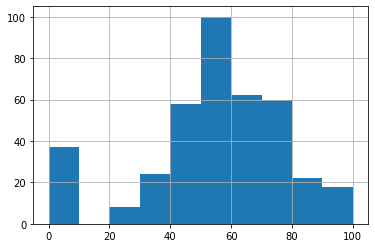

In [71]:
math.score.hist()
math.score.describe()
# 50% учеников имеют балл по математике от 40 до 70, среднее значение 55

TypeError: can't multiply sequence by non-int of type 'float'

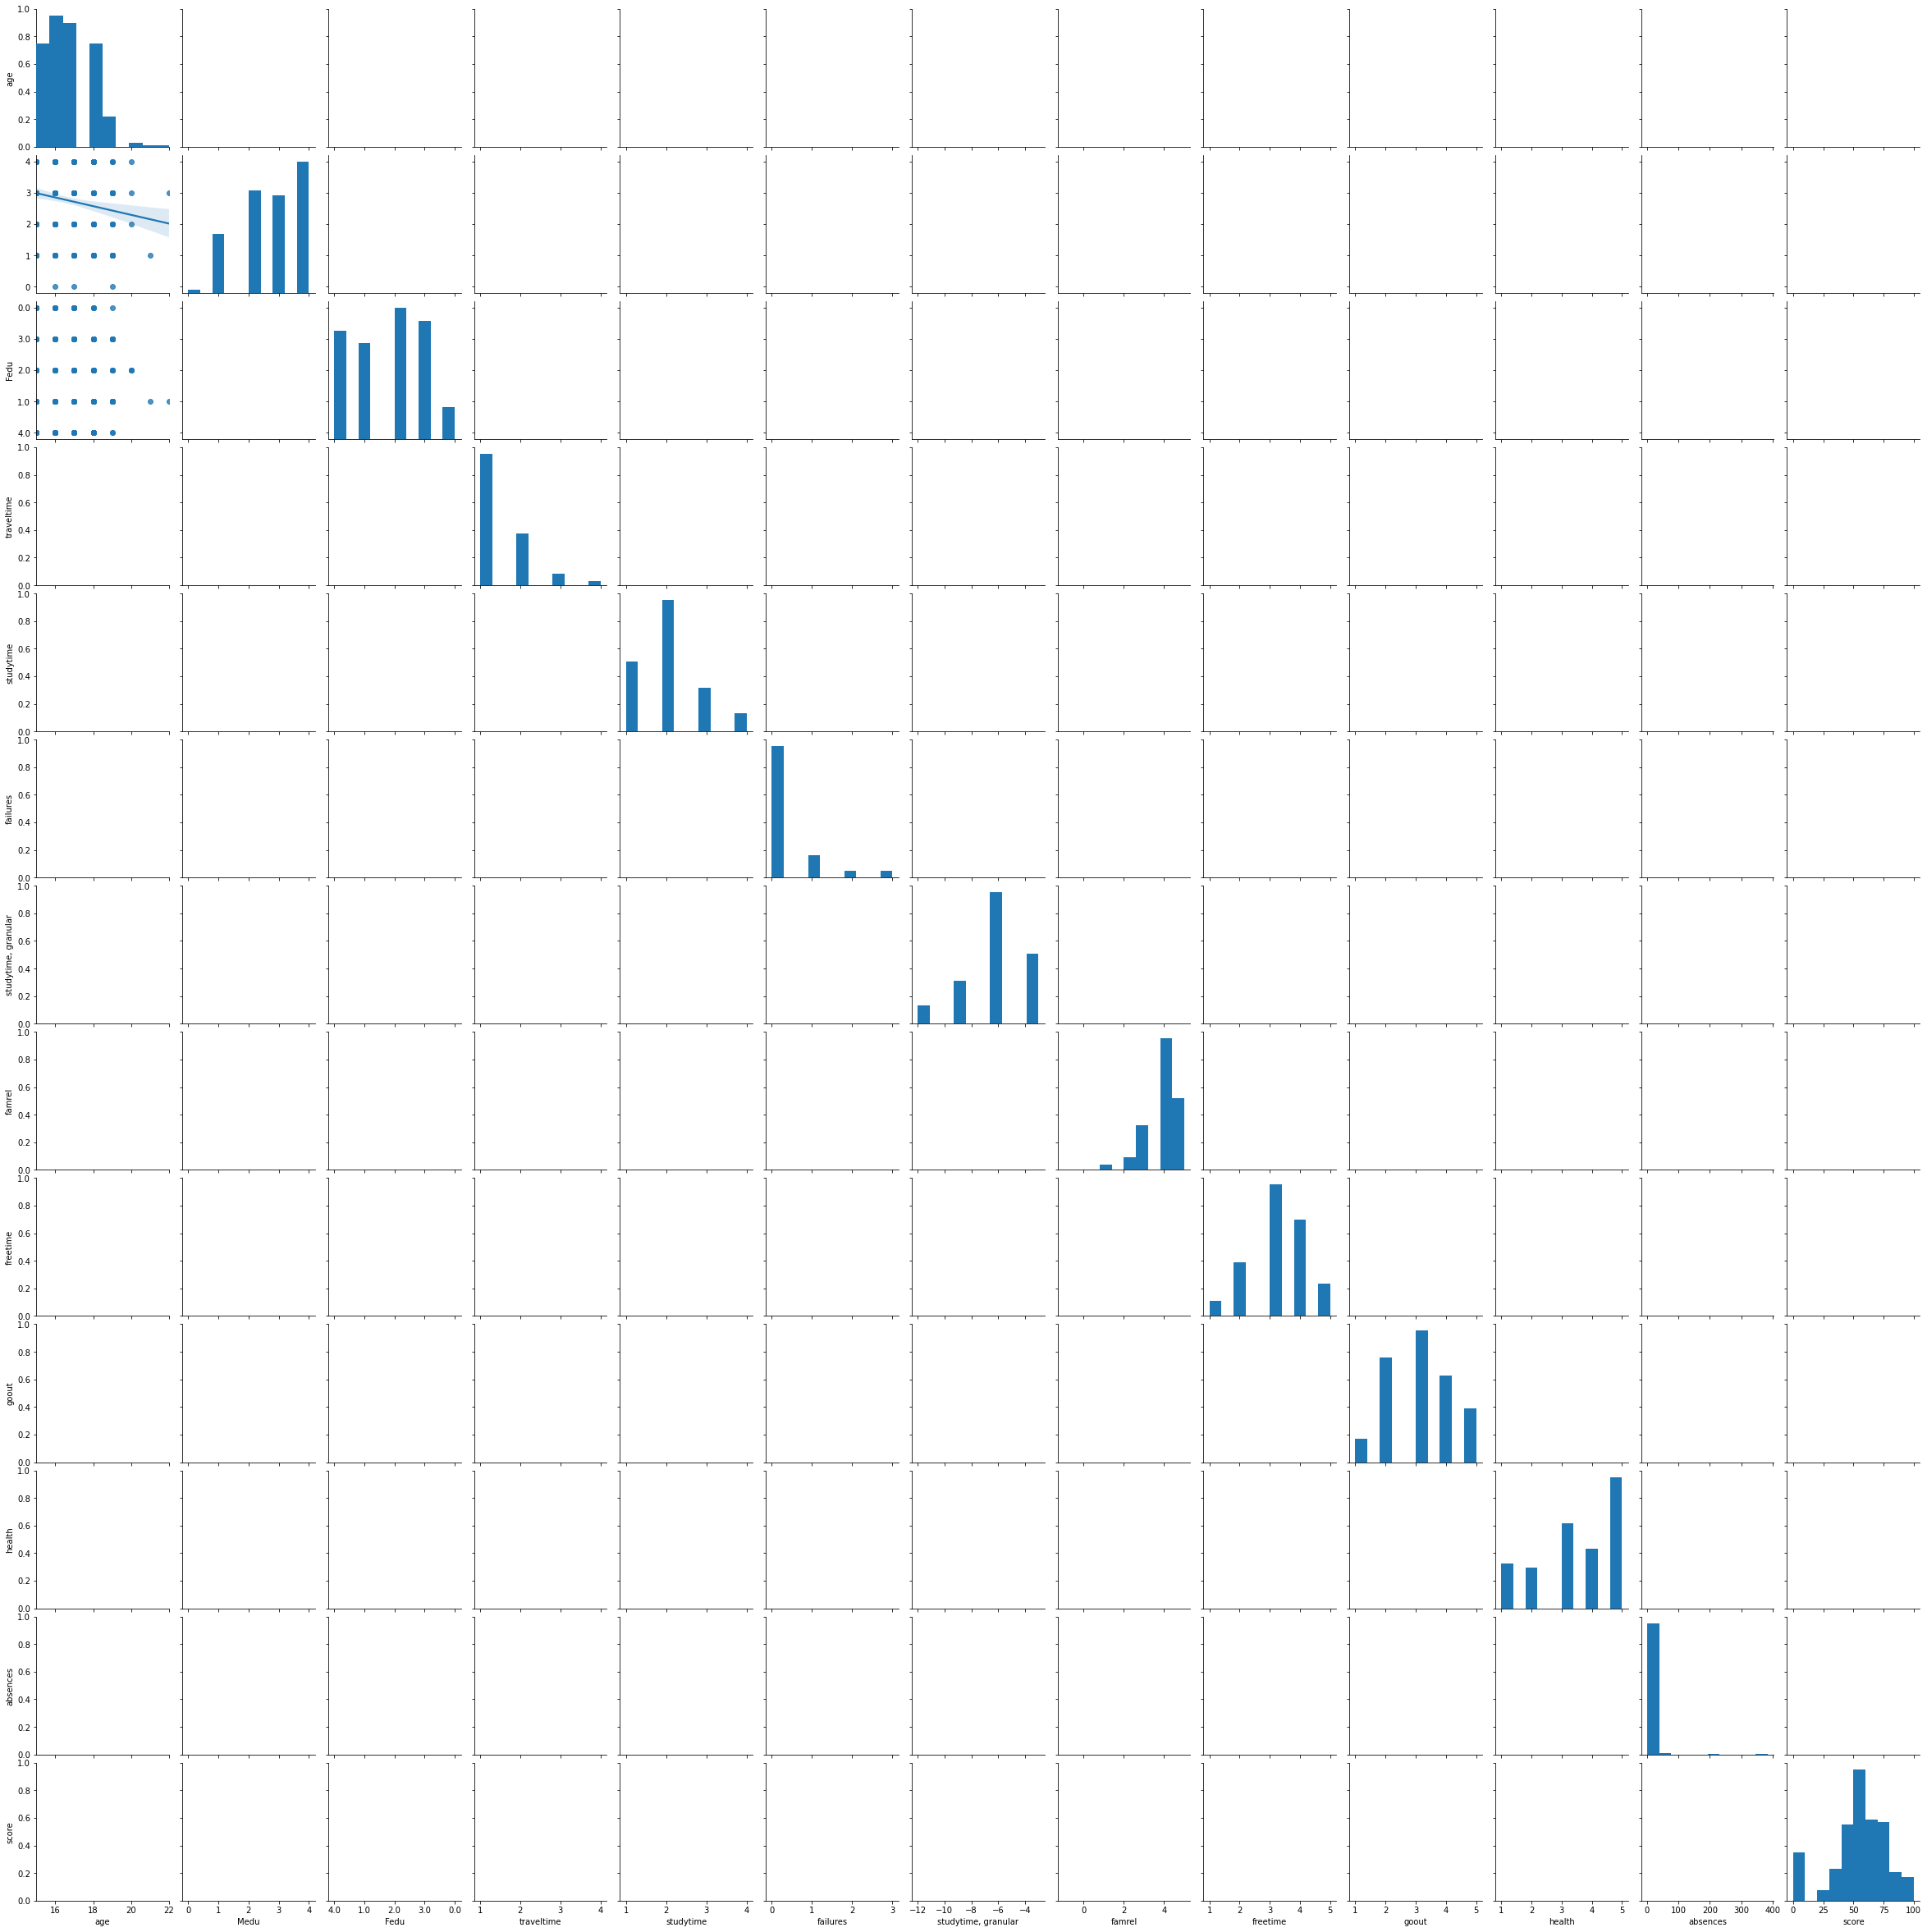

In [77]:
sns.pairplot(math, kind = 'reg')

In [78]:
math.corr()

,age,Medu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
traveltime,0.081508,-0.173515,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685
health,-0.065946,-0.045051,-0.021531,-0.080016,0.081284,0.080016,0.077474,0.061575,-0.015608,1.000000,-0.016222,-0.070460


In [79]:
# определили коэффициент корреляции между показателями и score:
# прямая линейная зависимость между score и Medu, studytime
# обратная линейная зависимость между score и age, failures (относительно других показателей у показателя failure
# зафиксирован самый высокий показатель корреляции), 'studytime.granular', goout

In [80]:
# studytime и studytime,granular обратно скоррелированы, то можно удалить один из них
math.drop(['studytime, granular'], inplace=True, axis=1)
math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,yes,no,yes,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,mother,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,no,yes,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,yes,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [81]:
# Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента.
def get_stat_dif(column):
    cols = math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'],
                     math.loc[math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [82]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob


In [83]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=math.loc[math.loc[:, column].isin(
                    math.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

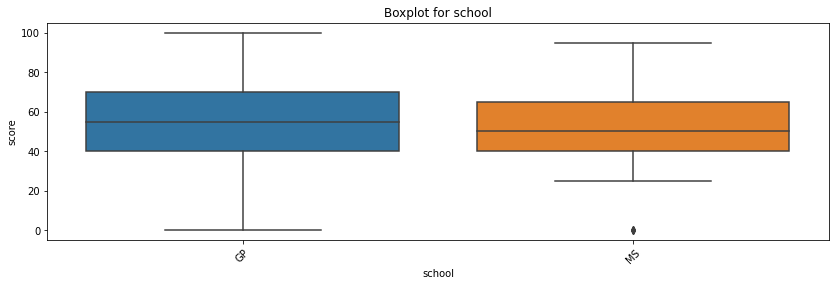

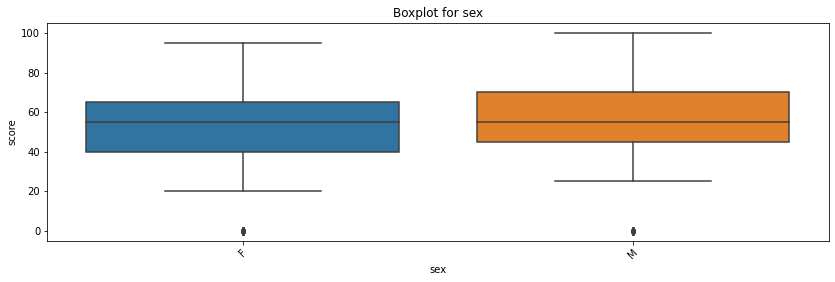

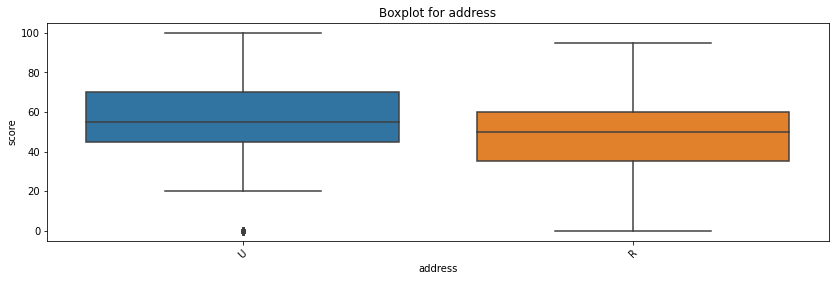

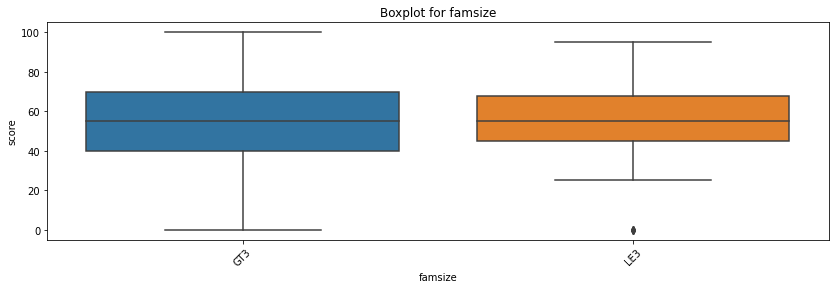

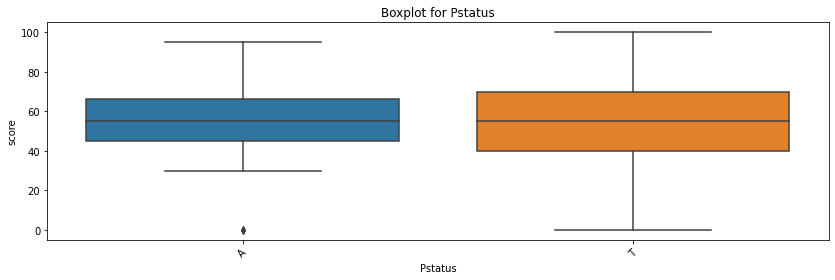

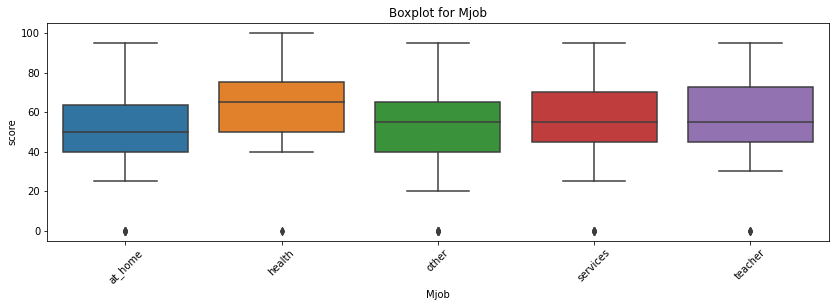

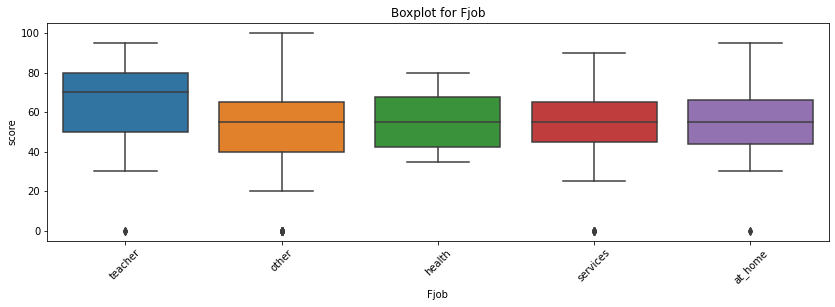

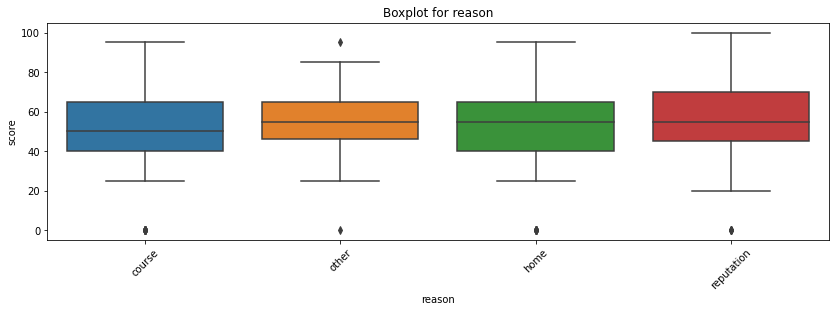

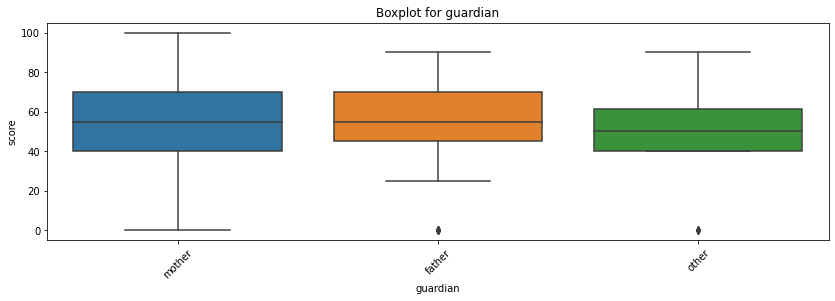

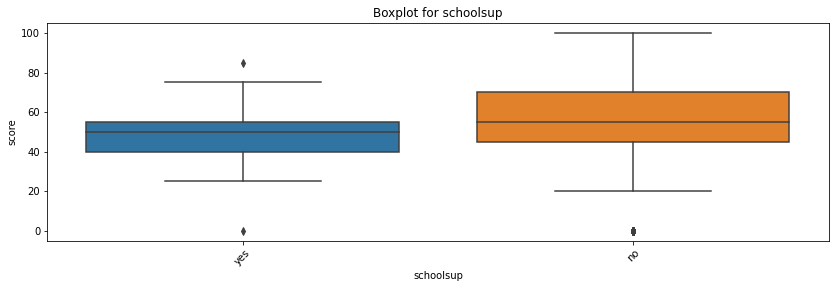

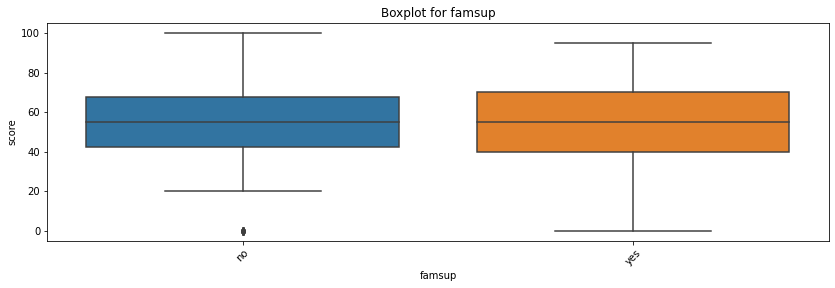

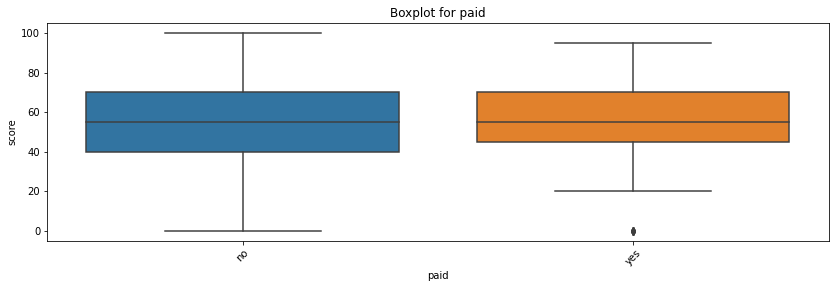

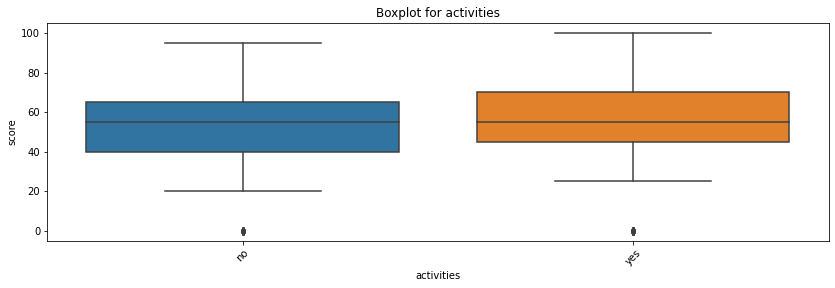

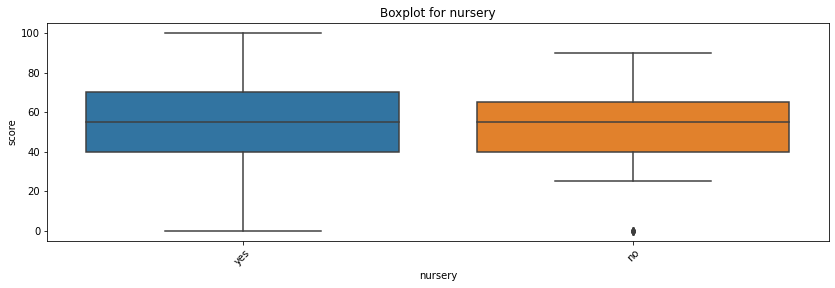

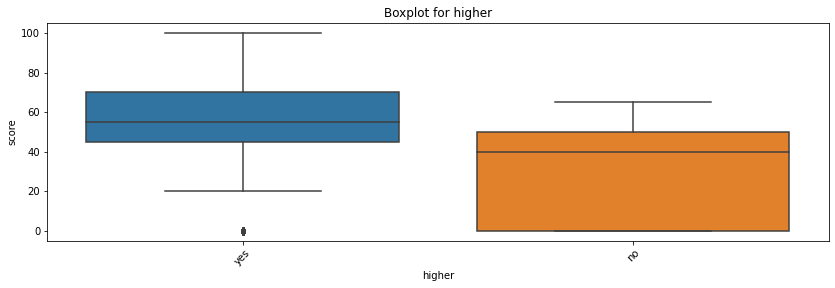

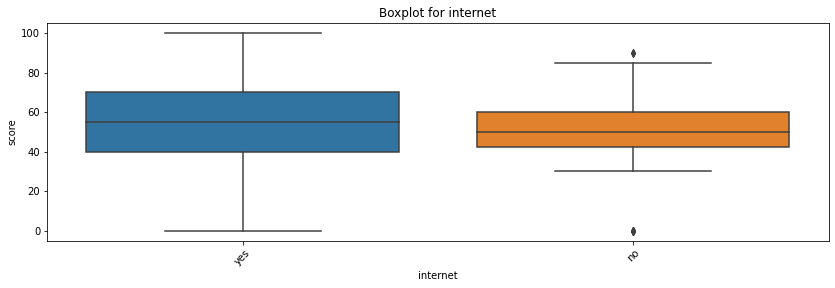

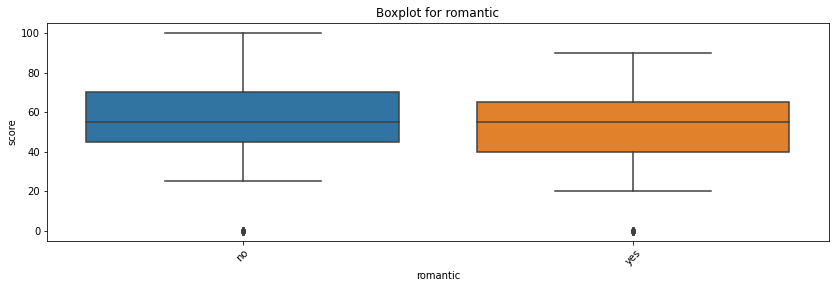

In [84]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [85]:
# Графики Боксплот показывают наличие зависимости показателя score от показателей Mjob(сильная - это увидели и по
# критерию Стьюдента), Fjob (слабая), higher (слабая)
# Проанализировав Боксплот по Fjob очевидно, что у отцов-учителей ребенок имеет относительно высокую оценку по
# математике, чем у у отцов других профессий
# Также график показывает наличие зависимости желания получить высшее образование и оценки по математике

In [86]:
math_for_model = math.loc[:, ['Mjob', 'age', 'goout',
                              'failures', 'studytime', 'higher', 'Fjob', 'Medu']]
math_for_model

,Mjob,age,goout,failures,studytime,higher,Fjob,Medu
0,at_home,18,4.0,0.0,2.0,yes,teacher,4.0
1,at_home,17,3.0,0.0,2.0,yes,other,1.0
2,at_home,15,2.0,3.0,2.0,yes,other,1.0
3,health,15,2.0,0.0,3.0,yes,other,4.0
4,other,16,2.0,0.0,2.0,yes,other,3.0
...,...,...,...,...,...,...,...,...
390,services,20,4.0,2.0,2.0,yes,services,2.0
391,services,17,5.0,0.0,1.0,yes,services,3.0
392,other,21,3.0,3.0,1.0,yes,other,1.0
393,services,18,1.0,0.0,1.0,yes,other,3.0


Итоговые выводы:
1. Пустые значения присутствали во всех столбцах, кроме school, sex, age.
2. Некоторые столбцы содержали выбросы - famrel, fedu
3. определили коэффициент корреляции между показателями и score:
прямая линейная зависимость между score и Medu, studytime
обратная линейная зависимость между score и age, failures (относительно других показателей у показателя failure
зафиксирован самый высокий показатель корреляции), 'studytime.granular', goout
4. Графики Боксплот показывают наличие зависимости показателя score от показателей Mjob(сильная - это увидели и по критерию Стьюдента), Fjob (слабая), higher (слабая)
Проанализировав Боксплот по Fjob очевидно, что у отцов-учителей ребенок имеет относительно высокую оценку по
математике, чем у у отцов других профессий
Также график показывает наличие зависимости желания получить высшее образование и оценки по математике
5. Найдены статистически значимые различия для колонки Mjob
6. Для построения модели отобраны следующие признаки 'Mjob', 'age', 'goout','failures', 'studytime', 'higher', 'Fjob', 'Medu'